In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
plt.figure(figsize=(15,15))
sns.set_style('darkgrid')
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',50)
warnings.filterwarnings('ignore')

<Figure size 1080x1080 with 0 Axes>

In [2]:
df_train=pd.read_csv("C:\\Users\\harsha k\\Desktop\\Digital recognition\\train.csv\\train.csv")
df_test=pd.read_csv("C:\\Users\\harsha k\\Desktop\\Digital recognition\\test.csv\\test.csv")
df_submit=pd.read_csv("C:\\Users\\harsha k\\Desktop\\Digital recognition\\sample_submission.csv")

In [3]:
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,...,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train.columns[df_train.isna().sum()>0]

Index([], dtype='object')

In [5]:
df_train['label'].value_counts().sort_index()

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

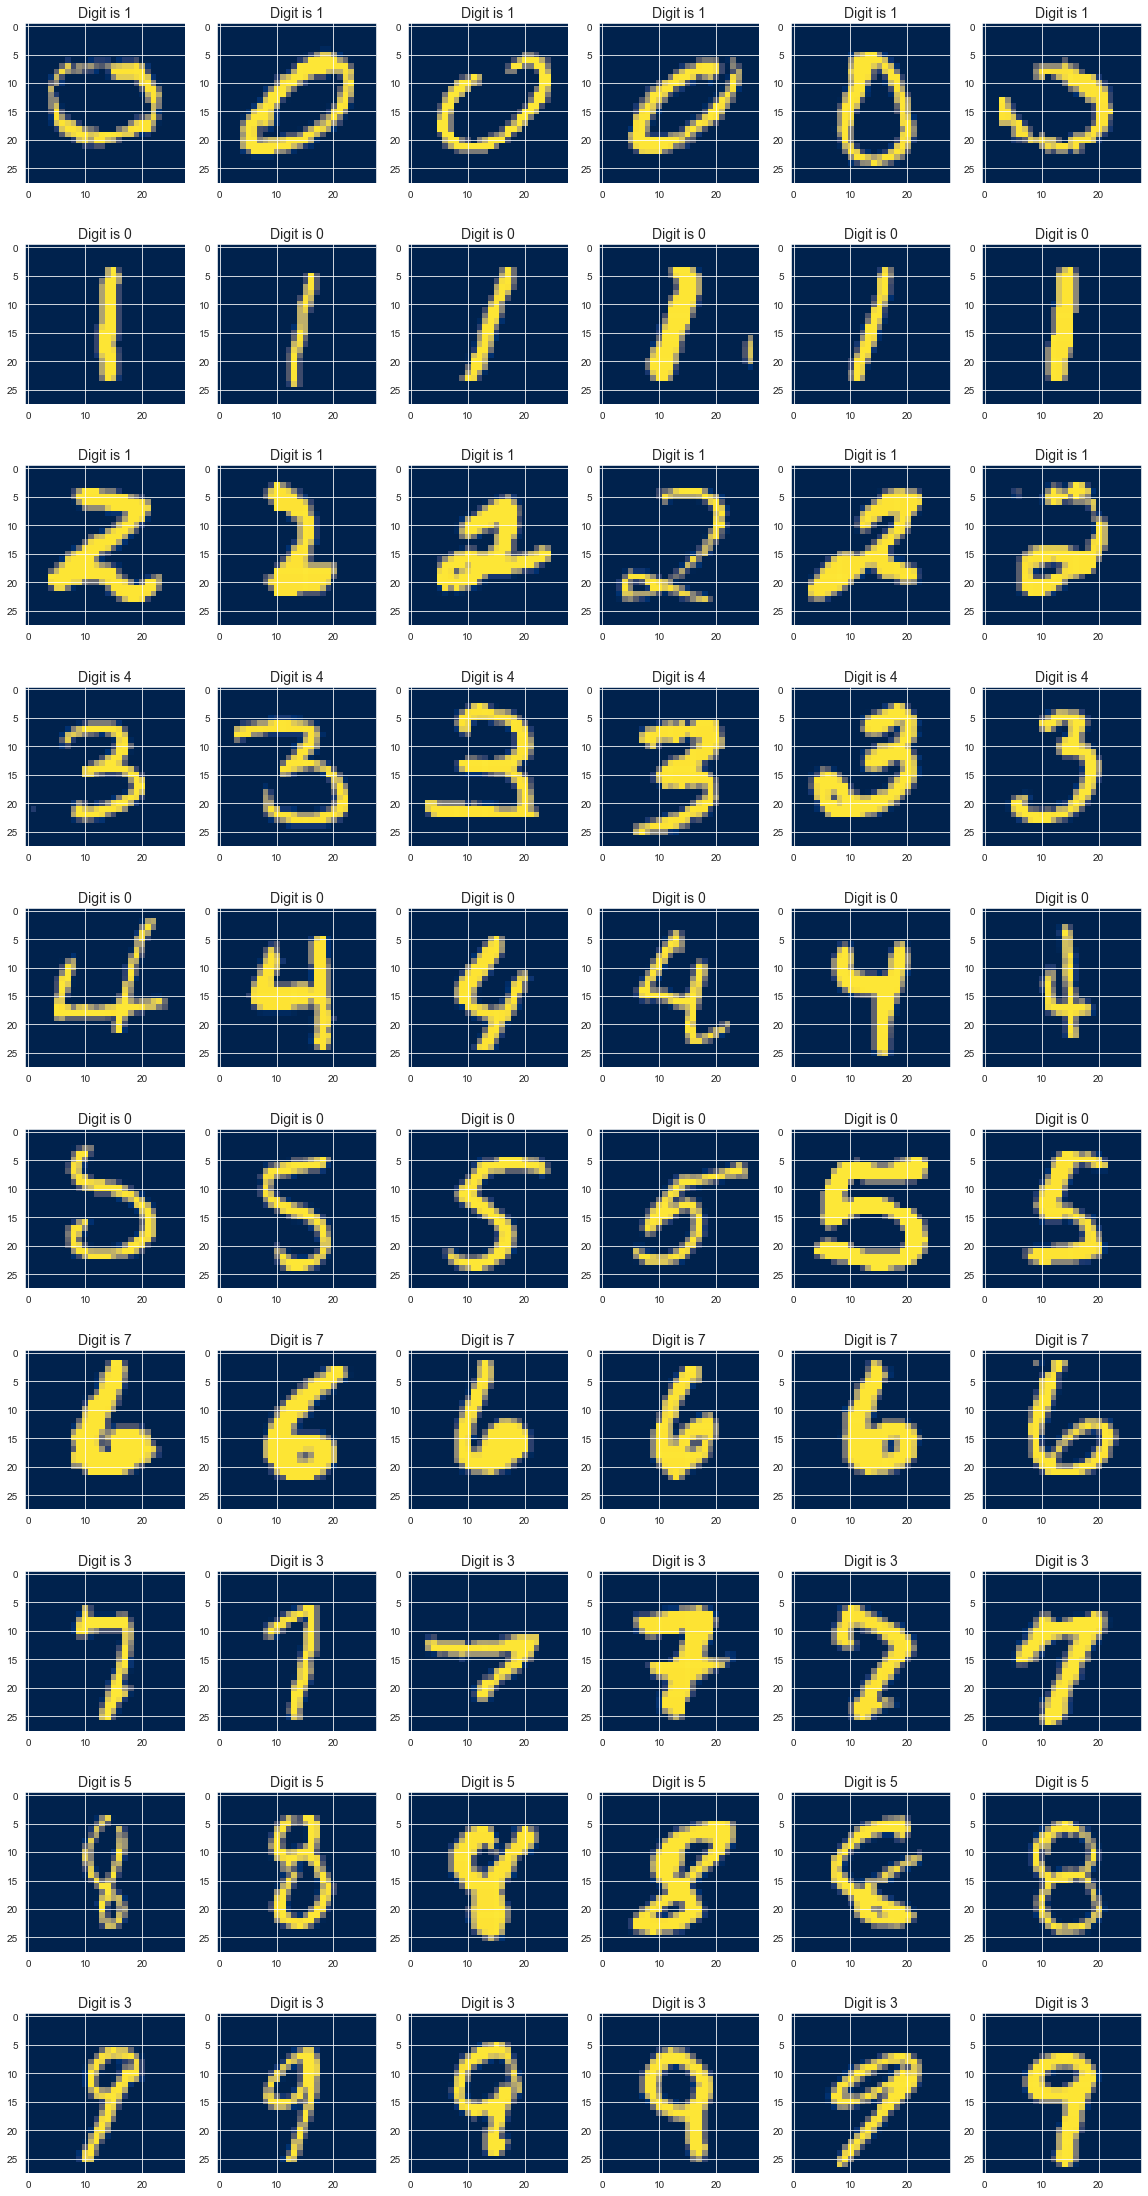

In [6]:
fig, axes=plt.subplots(nrows=10,ncols=6,figsize=(20,40) )
idx=0
for i in range(10):
    for j in (df_train[df_train.label==i].sample(n=6).index):
        digit= df_train['label'].loc[i]
        idx +=1
        plt.subplot(10,6,idx)
        plt.imshow(np.array(df_train.iloc[j, 1:]).reshape(28,28), cmap='cividis')
        plt.title(f'Digit is {digit}',fontsize=14)
plt.show()

In [7]:
for k in range(10):
    temp_freq=pd.Series(df_train.iloc[:,1:].sample(1).T.value_counts(),name='freq')
    print(temp_freq[temp_freq>3])
    print("="*30)
    



7159
0       610
254      57
13        5
29        4
Name: freq, dtype: int64
16035
0        675
253       22
5          4
107        4
243        4
Name: freq, dtype: int64
21444
0        578
253       76
56         6
89         5
219        4
65         4
122        4
Name: freq, dtype: int64
29063
0        606
255      124
128       28
64        14
191       12
Name: freq, dtype: int64
39313
0        723
Name: freq, dtype: int64
12287
0        588
252       84
253       17
79        10
94         6
Name: freq, dtype: int64
17757
0        633
255       89
128       35
64        14
191       13
Name: freq, dtype: int64
11810
0        618
254       46
228        7
117        4
Name: freq, dtype: int64
38094
0        646
255       94
128       25
191       11
64         8
Name: freq, dtype: int64
29523
0        629
254       20
187        4
Name: freq, dtype: int64


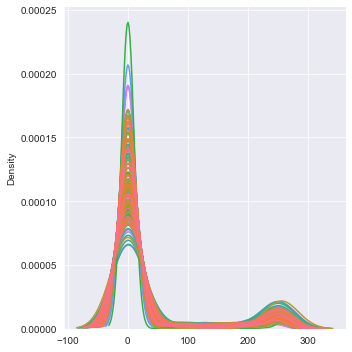

In [8]:
sns.displot(data=df_train.iloc[:,1:].sample(150).T, kind="kde", legend=False)
plt.show()

In [9]:
from sklearn.preprocessing import binarize, Binarizer

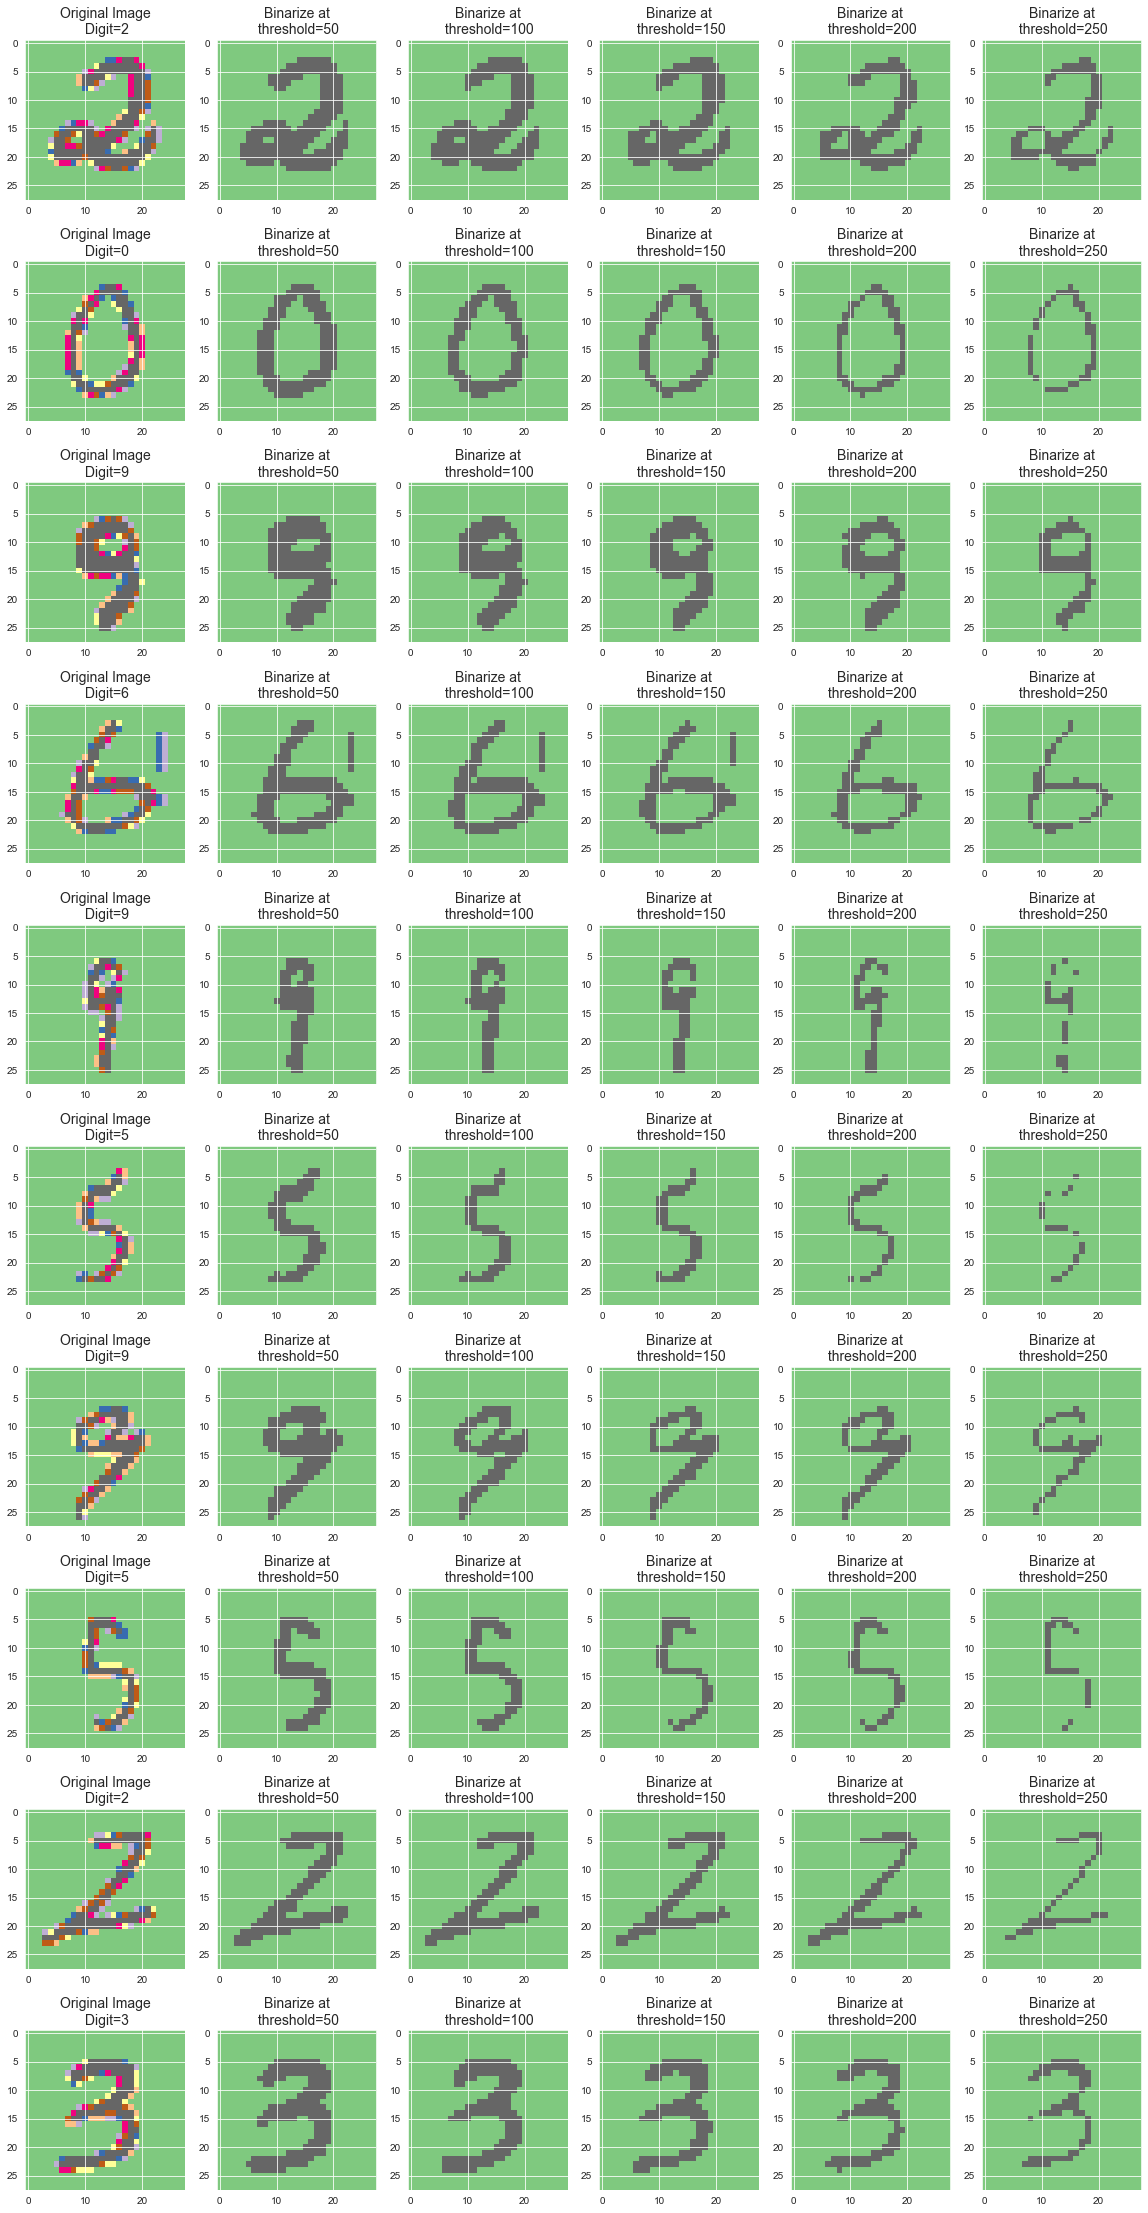

In [10]:
fig, axes=plt.subplots(nrows=10 ,ncols=6,figsize=(20,40))
idx=0
for k in np.random.choice(range(42000),10):
    img=np.array(df_train.iloc[k,1:]).reshape(28,28)
    idx+=1
    plt.subplot(10,6,idx)
    plt.imshow(img, cmap='Accent')
    plt.title(f'Original Image\n Digit={df_train.iloc[k,0]}',fontsize=14)
    for i in range(1,6):
        idx+=1
        plt.subplot(10,6,idx)
        plt.imshow(binarize(img, threshold=i*50), cmap="Accent")
        plt.title(f'Binarize at\n threshold={i*50}',fontsize=14)
plt.show()
        
        
   
        

In [11]:
x=df_train.iloc[:,1:]
y=df_train['label']

In [12]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(x)
x_best=pca.transform(x)
test_best=pca.transform(df_test)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_best,y , test_size=0.25)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(31500, 784)
(10500, 784)
(31500,)
(10500,)


In [15]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
    

In [16]:
svc_model=SVC()
svc_model.fit(x_train,y_train)
y_pred=svc_model.predict(x_test)

In [19]:
print("Accuracy score : \n",accuracy_score(y_test,y_pred))
print("classification_report : \n",classification_report(y_test,y_pred))
print("confusion_matrix : \n",confusion_matrix(y_test,y_pred))

Accuracy score : 
 0.9769523809523809
classification_report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1026
           1       0.99      0.99      0.99      1206
           2       0.97      0.98      0.97      1055
           3       0.98      0.96      0.97      1095
           4       0.97      0.98      0.98       994
           5       0.97      0.98      0.97       960
           6       0.98      0.99      0.99      1061
           7       0.98      0.97      0.98      1070
           8       0.97      0.97      0.97       962
           9       0.97      0.96      0.97      1071

    accuracy                           0.98     10500
   macro avg       0.98      0.98      0.98     10500
weighted avg       0.98      0.98      0.98     10500

confusion_matrix : 
 [[1015    0    0    0    1    3    5    0    2    0]
 [   0 1193    4    3    1    1    0    0    3    1]
 [   3    2 1031    1    3    0    3    5    6    

In [20]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid={"C":[0.1,1,10,100],"kernel":['ploy','linear','rbf','sigmoid']}

In [24]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .................................C=0.1, kernel=ploy; total time=   0.1s
[CV] END .................................C=0.1, kernel=ploy; total time=   0.1s
[CV] END .................................C=0.1, kernel=ploy; total time=   0.1s
[CV] END .................................C=0.1, kernel=ploy; total time=   0.1s
[CV] END .................................C=0.1, kernel=ploy; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time= 1.5min
[CV] END ...............................C=0.1, kernel=linear; total time= 1.6min
[CV] END ...............................C=0.1, kernel=linear; total time= 1.9min
[CV] END ...............................C=0.1, kernel=linear; total time= 1.6min
[CV] END ...............................C=0.1, kernel=linear; total time= 1.4min
[CV] END ..................................C=0.1, kernel=rbf; total time= 2.6min
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['ploy', 'linear', 'rbf', 'sigmoid']},
             verbose=2)

In [25]:
grid_pred=grid.predict(x_test)

In [26]:
print("Accuracy score : \n",accuracy_score(y_test,grid_pred))
print("classification_report : \n",classification_report(y_test,grid_pred))
print("confusion_matrix : \n",confusion_matrix(y_test,grid_pred))

Accuracy score : 
 0.981904761904762
classification_report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1026
           1       0.99      0.99      0.99      1206
           2       0.98      0.98      0.98      1055
           3       0.98      0.97      0.97      1095
           4       0.98      0.98      0.98       994
           5       0.97      0.98      0.98       960
           6       0.99      0.99      0.99      1061
           7       0.99      0.98      0.98      1070
           8       0.98      0.98      0.98       962
           9       0.98      0.97      0.97      1071

    accuracy                           0.98     10500
   macro avg       0.98      0.98      0.98     10500
weighted avg       0.98      0.98      0.98     10500

confusion_matrix : 
 [[1020    0    0    0    1    1    3    0    1    0]
 [   0 1198    2    3    1    1    0    0    1    0]
 [   3    2 1037    1    3    0    2    2    4    1

In [28]:
grid_pred_test=grid.predict(test_best)

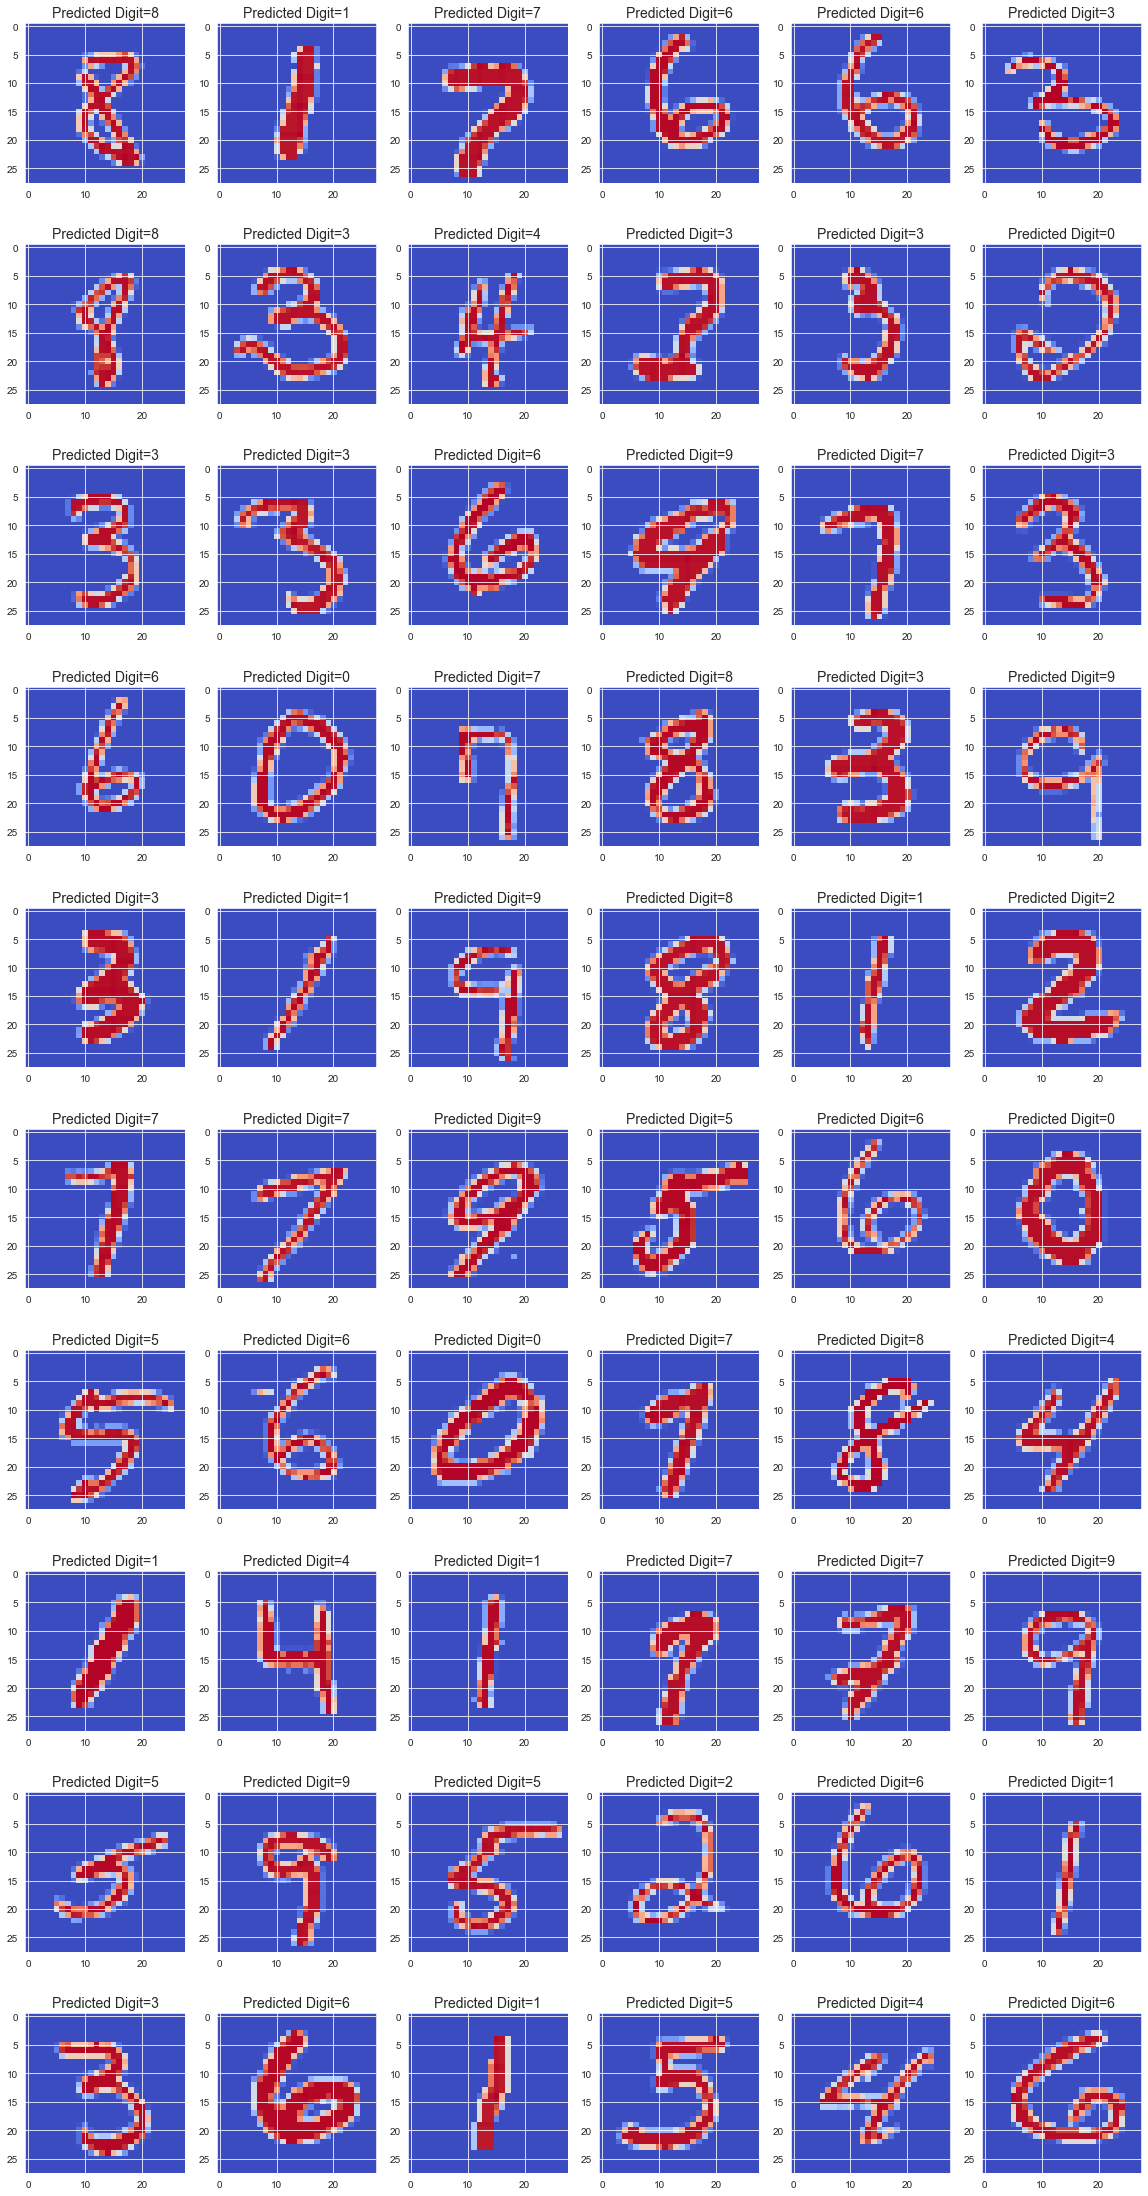

In [31]:
fig, axes=plt.subplots(nrows=10,ncols=6,figsize=(20,40))
idx=0
for k in np.random.choice(range(28000), 60):
    img=np.array(df_test.iloc[k,:]).reshape(28,28)
    idx +=1
    plt.subplot(10,6,idx)
    plt.imshow(img, cmap="coolwarm")
    plt.title(f'Predicted Digit={grid_pred_test[k]}',fontsize=14)
plt.show()

In [33]:
submit_dict={'Image_ID': range(1,28001),'label':pd.Series(grid_pred_test)}
submission=pd.DataFrame(submit_dict)
submission.to_csv('submission1.csv', index=False)